<a href="https://colab.research.google.com/github/Mercy-Njambi/Customer-Churn-Classification/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SyriaTel Customer Churn

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

## Data Understanding

- state -  the state the user lives in
- account length -  the number of days the user has this account
- area code - the code of the area the user lives in
- phone number - the phone number of the user
- international plan -  true if the user has the international plan, otherwise false
- voice mail plan -  true if the user has the voice mail plan, otherwise false
- number vmail messages -  the number of voice mail messages the user has sent
- total day minutes -  total number of minutes the user has been in calls during the day
- total day calls - total number of calls the user has done during the day
- total day charge -  total amount of money the user was charged by the Telecom company for calls during the day
- total eve minutes -  total number of minutes the user has been in calls during the evening
- total eve calls -  total number of calls the user has done during the evening
- total night minutes -  total number of minutes the user has been in calls during the night
- total night calls - total number of calls the user has done during the night
- total night charge - total amount of money the user was charged by the Telecom company for calls during the night
- total intl minutes -  total number of minutes the user has been in international calls
- total intl calls -  total number of international calls the user has done
- total intl charge -  total amount of money the user was charged by the Telecom company for international calls
- customer service calls -  number of customer service calls the user has done
- churn - true if the user terminated the contract, otherwise false


## Loading Data

In [1]:
# Loading from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Moringa Uploads/customer_churn.csv')

In [4]:
# Expand dataframe view
pd.set_option('display.max_columns', None)

In [5]:
# Explore head
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

In [7]:
# Checking Missing Values
print(f' The data has {df.isna().sum().sum()} missing values')

 The data has 0 missing values


In [8]:
# Checking duplicates
print(f' The data has {df.duplicated().sum()} duplicates')

 The data has 0 duplicates


## Exploratory Data Analysis (EDA)

1. What is the distribution of customer churn?
2. Where do most calls happen?
3. Which category has the highest revenue?
4. Which state has the most customers?
5. Is there a relationship between account length and churn?
6. Is there a relationship between customer service calls and churn?
7. What is the distribution of international plan subscriptions?

In [9]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## 1. What is the distribution of customer churn?

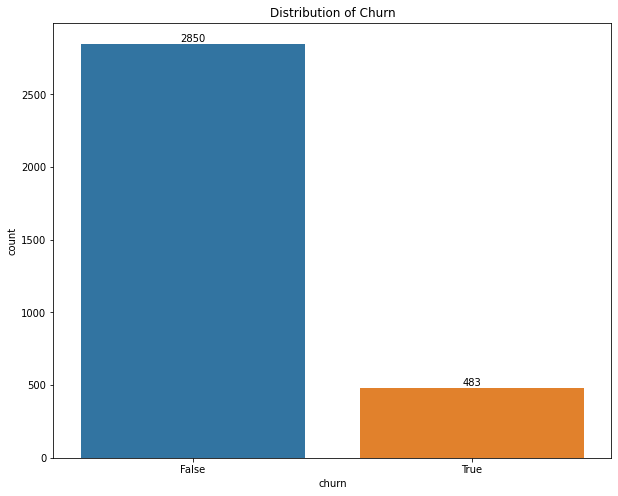

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=df, x='churn')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Churn');

- It can be noted that the company retained most of the customers, and only a few customers left.
- This dataset is also imbalanced.

## 2. Where do most calls happen?

In [12]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [14]:
#df.groupby(['total day minutes', 'total eve minutes', 'total night minutes']).sum()

In [58]:
total_day = df['total day minutes'].sum()
total_eve = df['total eve minutes'].sum()
total_night = df['total night minutes'].sum()
total_intl = df['total intl minutes'].sum()

total_day_chrge = df['total day charge'].sum()
total_eve_chrge = df['total eve charge'].sum()
total_night_chrge = df['total night charge'].sum()
total_intl_chrge = df['total intl charge'].sum()

In [59]:
total_minutes = [total_day, total_eve, total_night, total_intl]
total_charge = [total_day_chrge, total_eve_chrge, total_night_chrge, total_intl_chrge]

minutes_df = pd.DataFrame([total_minutes], columns=['Total Day', 'Total Evening', 'Total Night', 'Total Intl'], 
                          index=['Total Minutes Count'])

charges_df = pd.DataFrame([total_charge], columns=['Total Day', 'Total Evening', 'Total Night', 'Total Intl'], 
                          index=['Total Charge'])

In [60]:
minutes_df

,Total Day,Total Evening,Total Night,Total Intl
Total Minutes Count,599190.4,669867.5,669506.5,34120.9


In [61]:
charges_df

,Total Day,Total Evening,Total Night,Total Intl
Total Charge,101864.17,56939.44,30128.07,9214.35


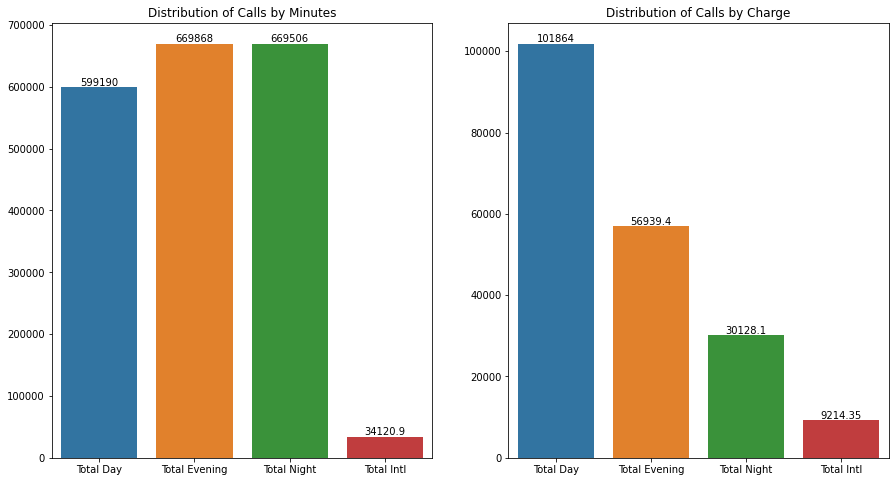

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

ax1 = sns.barplot(data=minutes_df, ax=axes[0])
ax1.bar_label(ax1.containers[0])
ax1.set_title('Distribution of Calls by Minutes')

ax2 = sns.barplot(data=charges_df, ax=axes[1])
ax2.bar_label(ax2.containers[0])
ax2.set_title('Distribution of Calls by Charge');

- Most calls happen in the evening and night.
- The least number of calls are the international ones.

## 3. Which category has the highest revenue?

In [22]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
